# Life Expectancy to GDP

### Import libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from pathlib import Path

### Data exploration

First lets load all the data into a pandas dataframe and take a look at the first few rows.
We have four columns; Country, Year, Life expectancy at birth (years) and GDP.

In [2]:
gdp = pd.read_csv('all_data.csv')

In [3]:
gdp.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [4]:
gdp.describe()

,Year,Life expectancy at birth (years),GDP
count,96.000000,96.000000,9.600000e+01
mean,2007.500000,72.789583,3.880499e+12
std,4.633971,10.672882,5.197561e+12
min,2000.000000,44.300000,4.415703e+09
25%,2003.750000,74.475000,1.733018e+11
50%,2007.500000,76.750000,1.280220e+12
75%,2011.250000,78.900000,4.067510e+12
max,2015.000000,81.000000,1.810000e+13


For brevity's sake, let's change the 'Life expectancy at birth (years)' column name to 'Life expectancy'

In [5]:
columns = gdp.columns.tolist()
columns[2] = 'Life expectancy'
gdp.columns = columns

Lets see which countries are represented in the data.
Six countries are listed below.

In [6]:
countries = gdp.Country.unique()
for country in countries:
    print(country)

Chile
China
Germany
Mexico
United States of America
Zimbabwe


And change 'United States of America to 'USA'

In [7]:
usa_str = 'United States of America'
size = gdp[gdp.Country==usa_str].shape[0]
gdp.loc[gdp.Country==usa_str, 'Country'] = ['USA'] * size
gdp[gdp.Country=='USA'].head()

,Country,Year,Life expectancy,GDP
64,USA,2000,76.8,1.030000e+13
65,USA,2001,76.9,1.060000e+13
66,USA,2002,77.0,1.100000e+13
67,USA,2003,77.2,1.150000e+13
68,USA,2004,77.5,1.230000e+13


In [8]:
countries = gdp.Country.unique()
for country in countries:
    print(country)

Chile
China
Germany
Mexico
USA
Zimbabwe


And let's take a look at which years are represented.

In [9]:
gdp.Year.unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015])

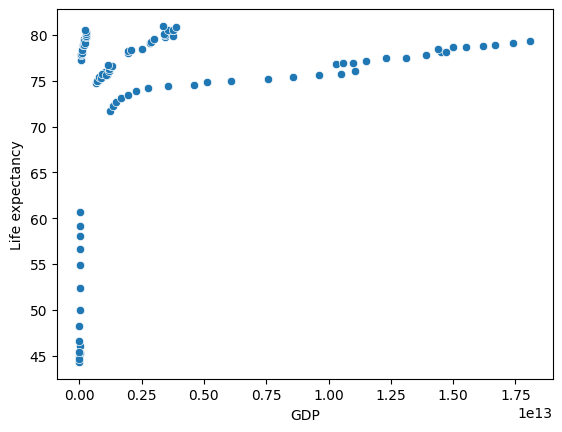

<Figure size 640x480 with 0 Axes>

In [10]:
fig1 = plt.figure()
sns.scatterplot(data=gdp, x = 'GDP', y= 'Life expectancy')
fig1.savefig('./figures/life_expectancy_to_gdp', bbox_inches='tight')
plt.show()
plt.clf()

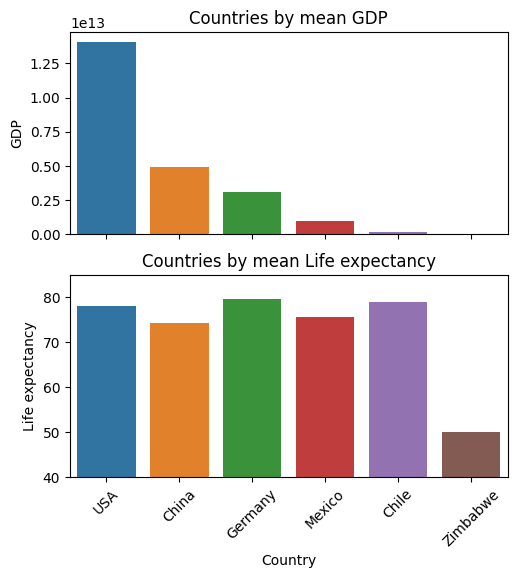

<Figure size 640x480 with 0 Axes>

In [11]:
# Countries ordered by GDP
fig2 = plt.figure(figsize=(5, 5))
avg_gdp = gdp.groupby(['Country']).mean().sort_values(by='GDP', ascending=False)

plt.subplot(2, 1, 1)
g1 = sns.barplot(data=avg_gdp, x=avg_gdp.index, y='GDP')
plt.title("Countries by mean GDP")
g1.set(xticklabels=[])
g1.set(xlabel=None)

# Countries by life expectancy, ordered by GDP
mean_life_expectancy = gdp.groupby(['Country']).mean().sort_values(by='Life expectancy', ascending=False)
plt.subplot(2, 1, 2)
sns.barplot(data=mean_life_expectancy, x=mean_life_expectancy.index, y='Life expectancy', order=avg_gdp.index, errorbar=None)
plt.xticks(rotation=45)
plt.title("Countries by mean Life expectancy")
plt.subplots_adjust(hspace=0.2, wspace=0.3, top=1, right=1)
plt.ylim(40, 85)
fig2.savefig('./figures/mean_life_expectancy_to_gdp_by_country.png', bbox_inches='tight')
plt.show()
plt.clf()

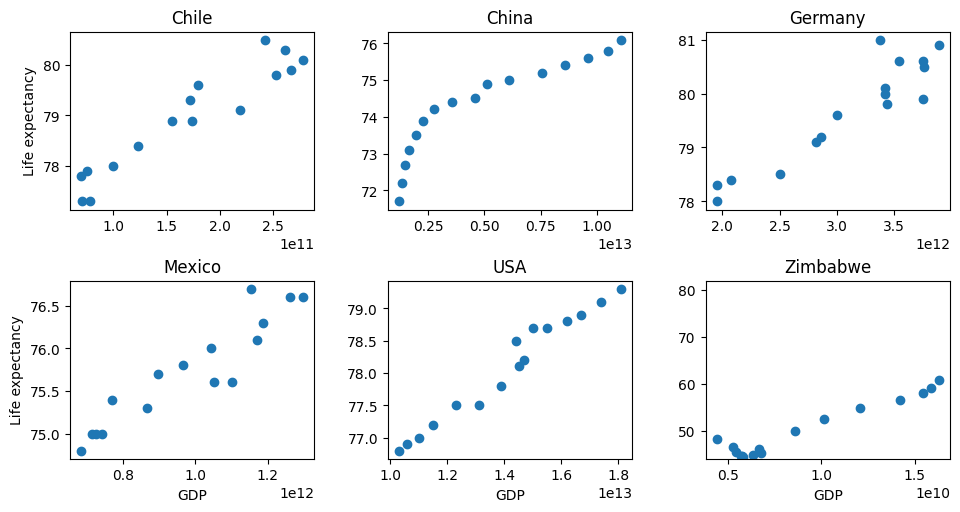

<Figure size 640x480 with 0 Axes>

In [12]:
fig3 = plt.figure()
max_age = np.round(gdp['Life expectancy'].max()) + 1
min_age = np.floor(gdp['Life expectancy'].min())
x_col = 'GDP'
y_col = 'Life expectancy'
num_rows = 2
num_cols = 3
num_countries = len(countries)
age = np.sort(gdp[y_col].unique())
axis = []
for i, country in enumerate(countries):
    country_data = gdp[gdp['Country']==country]
    plt.subplot(num_rows, num_cols, i+1)
    plt.scatter(country_data[x_col], country_data[y_col])
    plt.title(country)
    if i > num_rows:
        plt.xlabel(x_col)
    if i % num_cols == 0:
        plt.ylabel(y_col)
plt.subplots_adjust(hspace=0.4, wspace=0.3, top=1, right=1.5)
plt.ylim(min_age, max_age)
fig3.savefig('./figures/life_expectancy_to_gdp_by_country.png', bbox_inches='tight')
plt.show()
plt.clf()

The plots above show the life expectancy against GDP for each of the countries.

All the countries show a clear corralation between GDP and life expectancy within the context of each country. With higher GDP corresponding to higher life expectancy. With the average life span ranging roughly between 70 and 80 years. The exception being Zimbabwe with a much lower average life expectancy of roughly 45 to 62 years.
This descrepancy would warrent further investigation.

Between counties there are some inconsistanies which need futher examination. For example the GDP of the USA is much bigger than that of Germany. Yet the life expectancy in Germany is slightly higher, ranging from 
78 to 81 years compared to about 76 to 80 years for the USA. 

Likewise Mexico has a higher GDP than Chile, but has a lower Life expectancy ranging between about 74 to 77 years compared to that of Chile ranging from roughly 77 to 81 years.

What can we conclude from the plots above? It seems that although there is a corralation between GDP and longevity, GDP is not the only factor at play. In fact we can not be sure a this stage if GDP has a causal effect on life expectancy, despite the clear corralation.

In [13]:
gdp_per_capita_path = Path('.') / 'gdp_per_capita/'
gdp_per_capita_files = sorted(gdp_per_capita_path.glob('*.csv'))
gdp_per_capita_files

[PosixPath('gdp_per_capita/chile-gdp-per-capita.csv'),
 PosixPath('gdp_per_capita/china-gdp-per-capita.csv'),
 PosixPath('gdp_per_capita/germany-gdp-per-capita.csv'),
 PosixPath('gdp_per_capita/mexico-gdp-per-capita.csv'),
 PosixPath('gdp_per_capita/united-states-gdp-per-capita.csv'),
 PosixPath('gdp_per_capita/zimbabwe-gdp-per-capita.csv')]

In [14]:
def get_country_name_from_path(path):
    country_ = path.parts[-1].split('-')[:-3]
    return '_'.join(country_)

In [15]:
country_names = [get_country_name_from_path(path).capitalize() for path in gdp_per_capita_files]
country_names[country_names.index('United_states')] = 'USA'
country_names

['Chile', 'China', 'Germany', 'Mexico', 'USA', 'Zimbabwe']

In [16]:
gdp_per_cap_raw = [pd.read_csv(file, skiprows=16) for file in gdp_per_capita_files]
gdp_per_cap_raw[0].columns

Index(['date', ' GDP Per Capita (US $)', ' Annual Growth Rate (%)', ' '], dtype='object')

In [17]:
def clean_data(df, country_name):
    size = df.shape[0]
    years = [int(new_date[0:4]) for new_date in df.date.values]
    df['Year'] = years
    ret = pd.DataFrame()
    ret['Country'] = [country_name] * size
    ret['Year'] = df['Year']
    ret['GDP Per Capita (US $)'] = df[' GDP Per Capita (US $)']
    return ret

In [18]:
gdp_per_cap_list = [clean_data(df, country_name) 
                    for df, country_name 
                    in zip(gdp_per_cap_raw, country_names)]

In [19]:
for country in gdp_per_cap_list:
    print(country.Country.unique(), country.Year.min(), country.Year.max())

['Chile'] 1960 2022
['China'] 1960 2022
['Germany'] 1970 2022
['Mexico'] 1960 2022
['USA'] 1960 2022
['Zimbabwe'] 1960 2022


In [20]:
gdp[gdp.Country=='Zimbabwe'].head()

,Country,Year,Life expectancy,GDP
80,Zimbabwe,2000,46.0,6.689958e+09
81,Zimbabwe,2001,45.3,6.777385e+09
82,Zimbabwe,2002,44.8,6.342116e+09
83,Zimbabwe,2003,44.5,5.727592e+09
84,Zimbabwe,2004,44.3,5.805598e+09


In [21]:
gdp.set_index(['Country', 'Year'], inplace=True)

In [22]:
gdp_per_cap = pd.concat(gdp_per_cap_list)
gdp_per_cap.set_index(['Country', 'Year'], inplace=True)
gdp_per_cap.loc['Zimbabwe']

,GDP Per Capita (US $)
Year,
1960,276.6434
1961,279.3327
1962,275.9661
1963,277.5325
1964,282.3769
...,...
2018,2269.1770
2019,1421.8686
2020,1372.6967


In [23]:
gdp_per_cap = gdp.join(gdp_per_cap, how='inner')
gdp_per_cap = gdp_per_cap.reset_index()
gdp_per_cap

,Country,Year,Life expectancy,GDP,GDP Per Capita (US $)
0,Chile,2000,77.3,7.786093e+10,5097.1149
1,Chile,2001,77.3,7.097992e+10,4606.8906
2,Chile,2002,77.8,6.973681e+10,4479.1750
3,Chile,2003,77.9,7.564346e+10,4824.2205
4,Chile,2004,78.0,9.921039e+10,6185.5148
...,...,...,...,...,...
91,Zimbabwe,2011,54.9,1.209845e+10,1082.6158
92,Zimbabwe,2012,56.6,1.424249e+10,1290.1940
93,Zimbabwe,2013,58.0,1.545177e+10,1408.3678
94,Zimbabwe,2014,59.2,1.589105e+10,1407.0343


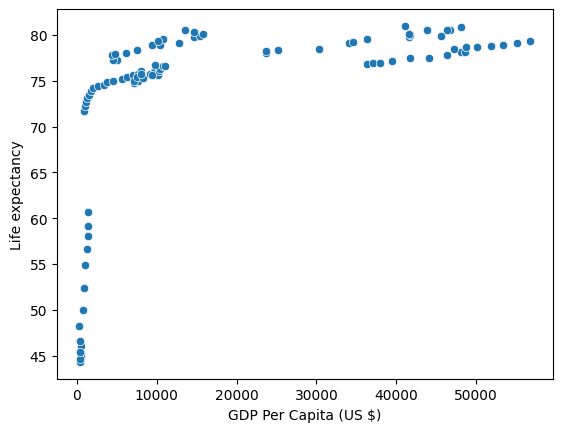

<Figure size 640x480 with 0 Axes>

In [24]:
fig4 = plt.figure()
sns.scatterplot(data=gdp_per_cap, x = 'GDP Per Capita (US $)', y= 'Life expectancy')
fig4.savefig('./figures/life_expectancy_to_gdp_per_capita.png', bbox_inches='tight')
plt.show()
plt.clf()

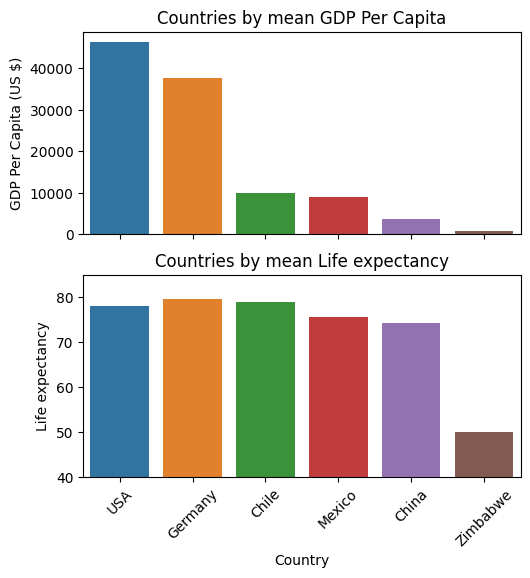

<Figure size 640x480 with 0 Axes>

In [25]:
# Countries ordered by GDP
fig5 = plt.figure(figsize=(5, 5))
avg_gdp = gdp_per_cap.groupby(['Country']).mean().sort_values(by='GDP Per Capita (US $)', ascending=False)

plt.subplot(2, 1, 1)
g1 = sns.barplot(data=avg_gdp, x=avg_gdp.index, y='GDP Per Capita (US $)')
g1.set(xticklabels=[])
g1.set(xlabel=None)
# plt.xticks(rotation=45)
plt.title("Countries by mean GDP Per Capita")

# Countries by life expectancy, ordered by GDP
mean_life_expectancy = gdp.groupby(['Country']).mean().sort_values(by='Life expectancy', ascending=False)
plt.subplot(2, 1, 2)
sns.barplot(data=mean_life_expectancy, x=mean_life_expectancy.index, y='Life expectancy', order=avg_gdp.index, errorbar=None)
plt.xticks(rotation=45)
plt.title("Countries by mean Life expectancy")
plt.subplots_adjust(hspace=0.2, wspace=0.3, top=1, right=1)
plt.ylim(40, 85)
fig5.savefig('./figures/mean_life_expectancy_to_gdp_per_cap_by_country.png', bbox_inches='tight')
plt.show()
plt.clf()

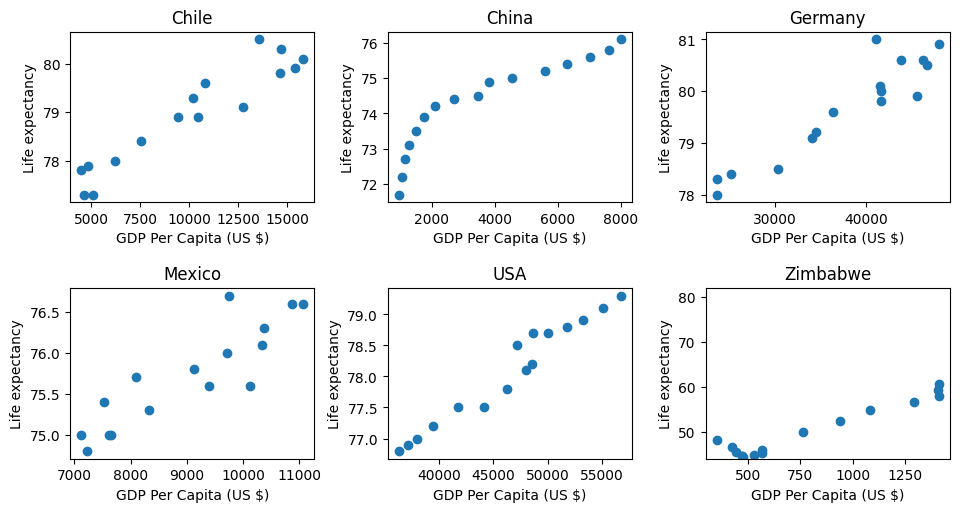

<Figure size 640x480 with 0 Axes>

In [26]:
fig6 = plt.figure()
countries = gdp_per_cap.Country.unique()
max_age = np.round(gdp_per_cap['Life expectancy'].max()) + 1
min_age = np.floor(gdp_per_cap['Life expectancy'].min())
x_col = 'GDP Per Capita (US $)'
y_col = 'Life expectancy'
num_countries = len(countries)
age = np.sort(gdp_per_cap[y_col].unique())
axis = []
for i, country in enumerate(countries):
    country_data = gdp_per_cap[gdp_per_cap['Country']==country]
    plt.subplot(2, 3, i+1)
    plt.scatter(country_data[x_col], country_data[y_col])
    plt.title(country)
    plt.xlabel(x_col)
    plt.ylabel(y_col)
plt.subplots_adjust(hspace=0.5, wspace=0.3, top=1, right=1.5)
plt.ylim(min_age, max_age)
fig6.savefig('./figures/life_expectancy_to_gdp_per_capita_by_country.png', bbox_inches='tight')
plt.show()
plt.clf()